In [19]:
import pandas as pd
# from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as go

import datetime
import plotly.express as px
# import matplotlib.mlab as mlab
# from statistics import mean
# import pylab
import math
# import tweepy
# from botometer import Botometer
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="gianluca.nogara@gmail.com")
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import sys
sys.path.append('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/notebook/tweet_utils')
import tweets_utils
import csv
import importlib
from tqdm.notebook import tqdm
%autosave 3600

Autosaving every 3600 seconds


In [14]:
bot_tweets =  730483
bot_original = 310406
bot_retweets = 384562
bot_replies = 21153
bot_quotes = 15133
bot_values = [(bot_original/bot_tweets), (bot_retweets/bot_tweets), 
              (bot_replies/bot_tweets), (bot_quotes/bot_tweets)]

human_tweets = 312673
human_original = 35514
human_retweets = 198042
human_replies = 41230
human_quotes = 37887
human_values = [(human_original/human_tweets), (human_retweets/human_tweets), 
              (human_replies/human_tweets), (human_quotes/human_tweets)]

bad_tweets = 19159
bad_original = 13535
bad_retweets = 2834
bad_replies = 1622
bad_quotes = 1168
bad_values = [(bad_original/bad_tweets), (bad_retweets/bad_tweets), 
              (bad_replies/bad_tweets), (bad_quotes/bad_tweets)]


good_tweets = 750820
good_original = 146304
good_retweets = 287203
good_replies = 233374
good_quotes = 83939
good_values = [(good_original/good_tweets), (good_retweets/good_tweets), 
              (good_replies/good_tweets), (good_quotes/good_tweets)]

susp_tweets = 97562
susp_original = 24482
susp_retweets = 56138
susp_replies = 9272
susp_quotes = 7670
susp_values = [(susp_original/susp_tweets), (susp_retweets/susp_tweets), 
              (susp_replies/susp_tweets), (susp_quotes/susp_tweets)]

In [23]:
labels = ["Original", "Retweet", "Reply", "Quote"]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=bad_values, x=labels, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=good_values, x=labels, name="Good"))
fig.add_trace(go.Histogram(histfunc="sum", y=human_values, x=labels, name="Human"))
fig.add_trace(go.Histogram(histfunc="sum", y=bot_values, x=labels, name="Bot"))
fig.add_trace(go.Histogram(histfunc="sum", y=susp_values, x=labels, name="Suspended"))

fig.update_layout(
    title="Differences between Users activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()

In [2]:
files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")
files_users = glob.glob("F:/Supsi/COVID-19-Tweets/*/users.csv")

## Manage data

## Get info

In [3]:
cols_tweets = ['user_screen_name', "rt_user_screen_name", "rt_created_at"]
#     u'user_screen_name', 
#         u'rt_user_screen_name', u'rt_user_id', 
#         u'in_reply_to_screen_name', u'in_reply_to_user_id',
#         u'rt_created_at', u'in_reply_to_status_id'] 

cols_users = [u'id'] 

In [ ]:
def write_file(filename, serie_id, serie_user):
    filename = filename + ".csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "screen_name"])
        for i in range(len(serie_id)):
            writer.writerow([serie_id.keys()[i], serie_user.keys()[i]])

In [ ]:
def list_series(list_id, flag):
    if(flag == True):
        for i in range(len(list_id)):
                list_id[i] = str(int(list_id[i]))
    list_id = pd.Series(list_id).value_counts().sort_values(ascending=False)[:int(2e4)]
    return list_id

In [ ]:
# def id_user(user, u_id=u_id):
#     for i in range(len(u_id)):
#         if(user == u_id[i][1]):
#             return u_id[i][0]
#     return -1

In [ ]:
# def check_verified(user, u_id=u_id):
#     for i in range(len(u_id)):
#         if(user == u_id[i][1]):
#             if(u_id[i][2] == True):
#                 return True
#     return False

In [4]:
# result = []
# importlib.reload(tweets_utils)
# start_time = time.perf_counter()
# j = 0
# df = pd.DataFrame()
# for filename in files_users:
#     print(f"Reading file: {filename}")
#     result.extend(tweets_utils.process_all_data(filename, cols_users, False))
#     lista = result[j]
#     j = j + 1
#     print(f"Mese numero {j}")
#     for i in range(len(lista)):
#         df = df.append(lista[i]["df"])
#         df = df.drop_duplicates(subset=["id"])
# stop_time = time.perf_counter()
# print("Time: ",stop_time-start_time)

In [14]:
good = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/all_good_users.csv",
                  lineterminator="\n")
lst = list(good["screen_name"])

In [15]:
gen = pd.DataFrame()
feb = pd.DataFrame()
mar = pd.DataFrame()
apr = pd.DataFrame()
mag = pd.DataFrame()
lista_df = [gen, feb, mar, apr, mag]
from tqdm.notebook import tqdm
cont = 0
for filename in files_tweets:
    print("Process ", filename)
    for i in tqdm(pd.read_csv(filename, usecols=["created_at", "hashtags"], lineterminator="\n",
                        low_memory=False, chunksize=int(1e6))):
        lista_df[cont] = lista_df[cont].append(i[i["hashtags"]!="[]"])
    cont = cont + 1

Process  F:/Supsi/COVID-19-Tweets\2020-01\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-02\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-03\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-04\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-05\tweets.csv


0it [00:00, ?it/s]

In [24]:
# lista_df = [gen, feb, mar, apr, mag]
cont = 0
lst = ["gen", "feb", "mar", "apr", "mag"]
for i in lista_df:
    path = f"C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/hashtags/{lst[cont]}.csv"
    cont = cont + 1
    i.to_csv(path, line_terminator="\n", encoding="utf-8", index=False)

In [25]:
path = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/hashtags/*.csv")
lst = []
for i in tqdm(path[:5]):
    df = pd.read_csv(i, lineterminator="\n", low_memory=False)
    hashtags = tweets_utils.hashtag_process(df)
    val = pd.Series(hashtags).value_counts().sort_values(ascending=False)[:30]
    lst.append(val)

  0%|          | 0/5 [00:00<?, ?it/s]

In [26]:
for i in range(len(lst)):
    print(f"Mese {i}")
    print(lst[i])

Mese 0
coronavirus            487888
Wuhan                  108571
China                   95856
Coronavirus             94778
WuhanCoronavirus        49314
CoronavirusOutbreak     47165
CoronaVirus             32198
BREAKING                23863
coronaravirus           18810
CoronaOutbreak          18575
2019nCoV                17921
HongKong                16428
coronarvirus            16333
nCoV2019                14702
โคโรน่าไวรัส            13954
nCoV                    13516
WuhanPneumonia          12884
coronoavirus            12000
wuhan                   11822
coronovirus             10063
coronarovirus            9494
WuhanVirus               9335
WuhanCoronovirus         9181
china                    6741
Taiwan                   5805
ไวรัสโคโรนา              5728
Chinese                  5050
CCP                      4915
SARS                     4482
WuhanOutbreak            4313
dtype: int64
Mese 1
coronavirus             926882
Coronavirus             311606
China      

In [15]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
users = []
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, lst))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["user"])
    print(len(users))
#         users = list(set(users))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/Supsi/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
24393
Reading file: F:/Supsi/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
90145
Reading file: F:/Supsi/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
198041
Reading file: F:/Supsi/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chu

In [21]:
pd.DataFrame(users, columns=["screen_name"]).to_csv("C:/Users/gianl/Desktop/Gi/rt_good.csv", line_terminator="\n", encoding="utf-8", index=False)

### Process distribution

In [8]:
print("process users_retweet")
users_retweet = pd.Series(users_retweet).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_retweeted")
users_retweeted = pd.Series(users_retweeted).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_original")
users_original = pd.Series(users_original).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_reply")
users_reply = pd.Series(users_reply).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_replied")
users_replied = pd.Series(users_replied).value_counts().sort_values(ascending=False)[:int(2e4)]


process users_retweet
process users_retweeted
process users_original
process users_reply
process users_replied


In [31]:
lists = [users_retweet, users_retweeted, users_original, users_reply, users_replied]
str_lists = ["users_retweet", "users_retweeted", "users_original", "users_reply", "users_replied"]

In [33]:
for i in range(len(lists)):
    names = list(lists[i].keys())
    count = list(lists[i])
    frame = { 'Name': names, 'Count': count}
    df = pd.DataFrame(frame)
    path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/2k_tweets _count/")
    df.to_csv(path[0] + str_lists[i] + ".csv", index=False)

In [61]:
def visualize_distribution(df, string):
    index = [10, 25, 50, 75, 90]
    perc_numpy = [np.percentile(df["Count"], i, interpolation='nearest') for i in index]
    print(perc_numpy)
    fig = px.histogram(df["Count"], title=f"Distribution of {string} tweets")
    fig.show()  

In [62]:
def print_all_distributions():
    df = pd.read_csv(path[0] + "users_original.csv")
    visualize_distribution(df, "original")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_reply.csv")
    visualize_distribution(df, "reply")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_replied.csv")
    visualize_distribution(df, "replied")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_retweet.csv")
    visualize_distribution(df, "retweet")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_retweeted.csv")
    visualize_distribution(df, "retweeted")

In [64]:
print_all_distributions()

## Writing files

In [ ]:
ids_retweeted = list_series(ids_retweeted, True)
users_retweeted = list_series(users_retweeted, False)
write_file("prova_retweeted", ids_retweeted, users_retweeted)
del ids_retweeted
del users_retweeted

In [ ]:
ids_retweet = list_series(ids_retweet, True)
users_retweet = list_series(users_retweet, False)
write_file("prova_retweet", ids_retweet, users_retweet)
del ids_retweet
del users_retweet

In [ ]:
hasnan = lambda array: any(filter(math.isnan, ids_original))

In [ ]:
hasnan4(ids_original)

In [ ]:
index = []
for i in range(len(ids_original)):
    if(math.isnan(ids_original[i])):
        index.append(i)
del ids_original[index[0]:index[-1]]
del users_original[index[0]:index[-1]]

In [ ]:
index = 0
for i in range(len(ids_original)):
    if(math.isnan(ids_original[i])):
        index = i

In [ ]:
del ids_original[index]
del users_original[index]

In [ ]:
hasnan4(ids_original)

In [ ]:
ids_original = list_series(ids_original, True)
users_original = list_series(users_original, False)
write_file("prova_original", ids_original, users_original)
del ids_original
del users_original

In [ ]:
ids_replied = list_series(ids_replied, True)
users_replied = list_series(users_replied, False)
write_file("prova_replied", ids_replied, users_replied)
del ids_replied
del users_replied

In [ ]:
ids_reply = list_series(ids_reply, True)
users_reply = list_series(users_reply, False)
write_file("prova_reply", ids_reply, users_reply)
del ids_reply
del users_reply

## Stats

In [8]:
print(f'Number of total tweets: {total_tweets}')
print(f'Number of original tweets: {original_n}')
print(f'Number of retweet: {retweet_n}')
print(f'Number of reply: {reply_n}')

perc_original = np.around(original_n*100/total_tweets,2)
perc_retweet = np.around(retweet_n*100/total_tweets,2)
perc_reply = np.around(reply_n*100/total_tweets,2)
print(f'Number of original_tweets: {perc_original}% of total tweets')
print(f'Number of retweets: {perc_retweet}% of total tweets')
print(f'Number of replies: {perc_reply}% of total tweets')

print('Check sum == len(tweets): ',original_n + retweet_n + reply_n == total_tweets)

Number of total tweets: 66412411
Number of original tweets: 13999715
Number of retweet: 48312504
Number of reply: 4100192
Number of original_tweets: 21.08% of total tweets
Number of retweets: 72.75% of total tweets
Number of replies: 6.17% of total tweets
Check sum == len(tweets):  True


## Daily Tweets

In [ ]:
val = pd.Series(dates)
val = val.value_counts(sort=True) 
fig = plt.figure(figsize=(14, 8))
ax = val[:25].plot(kind='bar', color='green', fig=(14,14))
ax.set_title('Number of TWEETS per day', fontsize=15)
# ax.invert_yaxis()
ax.set_xticklabels(val.index.format(), rotation='vertical')
plt.show()

In [5]:
import plotly.graph_objects as go
total_ccdh = 22215
original_ccdh = 17632
rt_ccdh =  2932
rp_ccdh = 1651

original_n = 13999715 
retweet_n = 48312504 
reply_n = 4100192 
total_tweets = 13999715 + 48312504 + 4100192
list_ccdh = [original_ccdh/total_ccdh, rt_ccdh/total_ccdh, rp_ccdh/total_ccdh]
label_ccdh = ["Original", "Retweet", "Reply"]
list_verified = [original_n/total_tweets, retweet_n/total_tweets, reply_n/total_tweets]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=list_ccdh, x=label_ccdh, name="Disinform Dozen"))
fig.add_trace(go.Histogram(histfunc="sum", y=list_verified, x=label_ccdh, name="Global"))
fig.update_layout(
    title="Differences between Dozen and global activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()

# Check quotes

In [12]:
cols = ["id", "created_at", "user_id", "user_screen_name", "text", "in_reply_to_screen_name", "rt_created_at", "quoted_status_created_at", "quoted_user_id", "urls"] 

In [21]:
for chunk in pd.read_csv(files_tweets[0], 
                         chunksize=10000, 
                         lineterminator = '\n',
#                          usecols = cols
                        ):
    df = chunk
    break
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   id_str                     10000 non-null  int64  
 2   created_at                 10000 non-null  object 
 3   user_id                    10000 non-null  int64  
 4   user_screen_name           10000 non-null  object 
 5   user_verified              10000 non-null  bool   
 6   user_created_at            10000 non-null  object 
 7   text                       10000 non-null  object 
 8   source                     10000 non-null  object 
 9   coordinates                3 non-null      object 
 10  is_quote_status            10000 non-null  bool   
 11  retweet_count              10000 non-null  int64  
 12  favorite_count             10000 non-null  int64  
 13  favorited                  10000 non-null  bool

In [15]:
# df[(df["quoted_status_created_at"].notna()) & (df["in_reply_to_screen_name"].notna())]

In [29]:
x = df[df["rt_created_at"].notna()]
y = x[x["quoted_status_created_at"].notna()]
y

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_status_text,quoted_status_created_at,quoted_user_id,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media


In [16]:
result = []
len_rt = 0
checksum_rt = 0
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols, True))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):

        len_rt = len_rt + lista[i]["rt_len"] 
        checksum_rt = checksum_rt + lista[i]["quotes_rt_len"]

stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)
print(checksum_rt)
print(len_rt)

### Treshold

In [36]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/score_avaxtar/")
good = pd.read_csv(path[0] + "good_users.csv", lineterminator="\n")
good = good.drop(good[good.score == "Error"].index)
bad = pd.read_csv(path[0] + "bad_dozen.csv", lineterminator="\n") 
bad2 = pd.read_csv(path[0] + "novax_manual.csv", lineterminator="\n") 
bad = bad.append(bad2)
good["score"] = good["score"].astype("float")
good_lst = list(good["score"])
good = good.append(bad)
good = good.iloc[:120 ,:]
total = good.append(bad)

In [83]:
def threshold_calculate(threshold):
    true_negative = 0
    false_negative = 0
    false_positive = 0
    true_positive = 0
    lst_score = list(total["score"])
    lst_name = list(total["screen_name"])
    
    for i in range(len(total["score"])):
        if lst_score[i] > threshold:
            if lst_name[i] in list(bad["screen_name"]):
#                 print(f"{lst_name[i]}, {lst_score[i]}")
                true_negative = true_negative  + 1
            else:
                false_negative = false_negative + 1
        else:
            if lst_name[i] in list(bad["screen_name"]):
                false_positive = false_positive + 1
            else:
                true_positive = true_positive + 1
    totali = len(good["score"])
    check = (totali == true_negative + false_negative + false_positive + true_positive)
    print(f"Threshold: {threshold}")
    print(f"TN: {true_negative} + FN: {false_negative} + FP: {false_positive} + TP: {true_positive}")

    precision = round(true_positive/(true_positive + false_positive),2)
    print(f"Precision: {precision}")
    recall = round(true_positive/(true_positive + false_negative),2)
    print(f"Recall: {recall}")
    accuracy = round((true_positive + true_negative) / ( true_negative + false_negative + false_positive + true_positive),2)
    print(f"Accuracy: {accuracy}")
    f1 = round(2* ((precision*recall)/(precision+recall)),2)
    print(f"F1: {f1}")
    print(f"Sensitivity (TPR): {recall}")
    specificity = round(true_negative/(true_negative+false_positive),2)
    print(f"Specificity: {specificity}")
    fpr = round(1 - specificity,2)
    print(f"FPR: {fpr}")

    print(f"{(1-fpr)*100}% of negatives are correctly classified")
    print(f"{recall*100}% of positives are correctly classified")
    print("________________________________________________")
    return (specificity, recall)

In [84]:
xy = []
xy.append(threshold_calculate(0.55))
xy.append(threshold_calculate(0.6))
xy.append(threshold_calculate(0.65))
xy.append(threshold_calculate(0.7))
xy.append(threshold_calculate(0.75))
xy.append(threshold_calculate(0.8))
xy.append(threshold_calculate(0.85))
xy.append(threshold_calculate(0.9))

Threshold: 0.55
TN: 106 + FN: 22 + FP: 15 + TP: 98
Precision: 0.87
Recall: 0.82
Accuracy: 0.85
F1: 0.84
Sensitivity (TPR): 0.82
Specificity: 0.88
FPR: 0.12
88.0% of negatives are correctly classified
82.0% of positives are correctly classified
________________________________________________
Threshold: 0.6
TN: 106 + FN: 17 + FP: 15 + TP: 103
Precision: 0.87
Recall: 0.86
Accuracy: 0.87
F1: 0.86
Sensitivity (TPR): 0.86
Specificity: 0.88
FPR: 0.12
88.0% of negatives are correctly classified
86.0% of positives are correctly classified
________________________________________________
Threshold: 0.65
TN: 104 + FN: 17 + FP: 17 + TP: 103
Precision: 0.86
Recall: 0.86
Accuracy: 0.86
F1: 0.86
Sensitivity (TPR): 0.86
Specificity: 0.86
FPR: 0.14
86.0% of negatives are correctly classified
86.0% of positives are correctly classified
________________________________________________
Threshold: 0.7
TN: 103 + FN: 14 + FP: 18 + TP: 106
Precision: 0.85
Recall: 0.88
Accuracy: 0.87
F1: 0.86
Sensitivity (TPR

In [85]:
x = []
y = []
for i in xy:
    x.append(i[0])
    y.append(i[1])

#### Hashtags

In [7]:
paths = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/hashtags/*.csv")
x = pd.DataFrame()
from tqdm import tqdm
for p in tqdm(paths):
    df_n = pd.read_csv(p, lineterminator="\n")
    x = x.append(df_n)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:37<00:00,  7.48s/it]


In [8]:
len(x)

15695945

In [24]:
from datetime import date
def get_series(hash_date, name):
    d = hash_date[hash_date["hashtag"]==name]["date"]
    dates_list = []
    for i in tqdm(list(d)):
        x = i.split()[0]
        if not "2" in x:
            x = tweets_utils.process_datetime(i)        
        dates_list.append(datetime.strptime(x, '%Y-%m-%d'))
    serie = pd.Series(dates_list, name=name).value_counts().sort_index()
    return serie

In [25]:
def plot_lines(hash_date, hashtags):
    x1 = get_series(hash_date, hashtags[0])
    x2 = get_series(hash_date, hashtags[1])
    x3 = get_series(hash_date, hashtags[2])
    x4 = get_series(hash_date, hashtags[3])
    x5 = get_series(hash_date, hashtags[4])
    df = pd.concat([x1, x2, x3, x4, x5], axis=1)
    df = df.fillna(0)
    df.sort_index(ascending=True, inplace=True)
    lines = df.plot.line(figsize=(14,6))
    lines.set_xlim([date(2020, 1, 1), date(2020, 6, 1)])

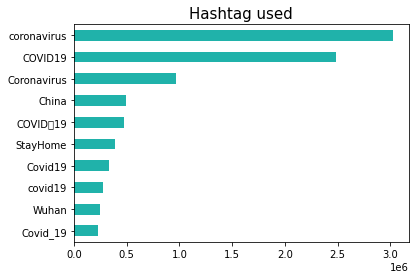

In [12]:
val = pd.Series(tweets_utils.hashtag_process(x))
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Hashtag used', fontsize=15)
ax.invert_yaxis()
plt.show()

In [15]:
importlib.reload(tweets_utils)
x = x.dropna()
hash_date = tweets_utils.hashtag_date(x)

0it [00:00, ?it/s]

In [23]:
hash_date.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/hashtag_date.csv",
                 line_terminator="\n", index=False, encoding="utf-8")

In [29]:
# hashtags = ["pizzagate", "DarkToLight", "5g", "wwg1wga","covid19"]
# plot_lines(hash_date, hashtags)

https://www.forbes.com/sites/thomasbrewster/2021/02/23/facebook-and-instagram-hashtag-crackdown-struggles-to-shut-down-covid-19-conspiracies/?sh=583dd557187b

In [6]:
path_sage_rt = "F:/Supsi/COVID-19-Tweets/large_files/sage_data/hs_rt_bad_good.csv"
path_sage = "F:/Supsi/COVID-19-Tweets/large_files/sage_data/hs_bad_good.csv"
sage_good_bad = pd.read_csv(path_sage_rt, lineterminator="\n")
sage_good_bad
# print(sage_good_bad.last_valid_index())

,source,word,sage,file_count,file_rate,base_count,base_rate
0,.\data\rt_hs_bad.txt,thedefender,2.157602,304331,0.018539,304342,0.003273
1,.\data\rt_hs_bad.txt,hankaaron,2.157399,6735,0.000410,6735,0.000072
2,.\data\rt_hs_bad.txt,dolworth,2.157393,6578,0.000401,6578,0.000071
3,.\data\rt_hs_bad.txt,zook,2.157347,5546,0.000338,5546,0.000060
4,.\data\rt_hs_bad.txt,classen,2.157295,4714,0.000287,4714,0.000051
5,.\data\rt_hs_bad.txt,bart,2.157295,4713,0.000287,4713,0.000051
6,.\data\rt_hs_bad.txt,we89,2.157249,4147,0.000253,4147,0.000045
7,.\data\rt_hs_bad.txt,willowbrook,2.157235,4005,0.000244,4005,0.000043
8,.\data\rt_hs_bad.txt,chum,2.157231,6416,0.000391,6417,0.000069
9,.\data\rt_hs_bad.txt,isaiah,2.157203,3705,0.000226,3705,0.000040


In [3]:
sage_good_bad_ = pd.read_csv(path_sage, lineterminator="\n")
sage_good_bad_

,source,word,sage,file_count,file_rate,base_count,base_rate
0,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,thedefender,4.474934,14256,0.442870,14256,0.034374
1,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,poli,4.472942,804,0.024977,804,0.001939
2,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,truthaboutcovid,4.472457,441,0.013700,441,0.001063
3,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,aleksandrlukashenko,4.468981,194,0.006027,194,0.000468
4,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,nswlockdown,4.465973,163,0.005064,163,0.000393
5,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,trumponeaz,4.464776,115,0.003573,115,0.000277
6,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,monsanto,4.462953,96,0.002982,96,0.000231
7,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,amindofyourown,4.460962,89,0.002765,89,0.000215
8,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,bribery,4.459001,80,0.002485,80,0.000193
9,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,boycottnfl,4.458815,79,0.002454,79,0.000190
